In [1]:
'''
HW2
'''
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_Errors(X, sol, label):
    X = np.abs(X-sol)
    plt.plot(X, label=label)
    plt.yscale('log')

conv? = True, #it =   4, x = 1.2599218605659261
conv? = True, #it =  18, x = 1.2599258422851562


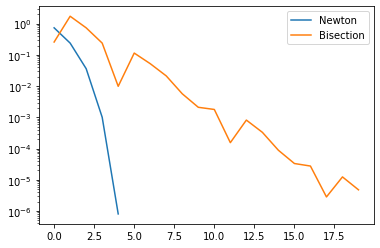

In [3]:
### Problem 1 ###
def Newton_test(f, df, x, sol, tol=1e-5, itlim = 100, verbose = False, print_res = True):
    itcnt = 0;
    conv = False # True if converged
    X = np.zeros(itlim+1)
    X[0] = x
    while True:
        x_next = x - f(x)/df(x)
        itcnt += 1
        X[itcnt] = x_next
        if verbose:
            print( f"#it = {itcnt:3d} : x = {x_next:.8f}")
        x = x_next
        if np.abs(x - sol) < tol:
            conv = True
            break
        if itcnt >= itlim:
            break
    X = X[:itcnt+1]
    if print_res:
        print(f"conv? = {conv}, #it = {itcnt:3d}, x = {x_next}")
    return X, conv

def Bisection(f, a, b, tol=1e-5, itlim = 100, verbose = False, print_res = True):
    itcnt = 0;
    conv = False # True if converged
    X = np.zeros(itlim+2)
    X[0] = a
    X[1] = b
    while f(a)*f(b)<0:
        c = (a+b)/2
        if f(a)*f(c)<0:
            b = c
        else:
            a = c
        itcnt += 1
        X[itcnt+1] = c
        if verbose:
            print( f"#it = {itcnt:3d} : x = {c:.5f}")
        if np.abs(b - a) < tol:
            conv = True
            break
        if itcnt >= itlim:
            break
    X = X[:itcnt+2]
    if print_res:
        print(f"conv? = {conv}, #it = {itcnt:3d}, x = {c}")
    return X, conv
    
f = lambda x: x**3-2
df = lambda x: 3*x**2
sol = 2**(1/3)
x0 = 2
X_Newton, _ = Newton_test(f, df, x0, sol, verbose=False)
X_Bisection, _ = Bisection(f, a=1, b=3, verbose=False)
plot_Errors(X_Newton, sol, "Newton")
plot_Errors(X_Bisection, sol, "Bisection")
plt.legend();

conv? = True, #it =   8, x = -0.8654740331019471
1.0009770790020411e-12


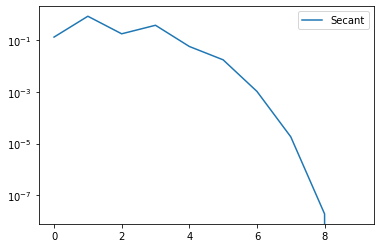

In [4]:
### Problem 2 ###
def Secant(f, a, b, tol=1e-5, itlim=100, verbose=False, print_res = True):
    itcnt = 0
    conv = False
    X = np.zeros(itlim+2)
    X[0] = a
    X[1] = b
    while True:
        itcnt += 1
        c = b - f(b)*(b-a)/(f(b)-f(a))
        X[itcnt+1] = c
        if np.isnan(c):
            print( f"NaN found. Last successful iteration(#it = {itcnt-1:3d}) : x = {b:.5f}")
            return X[:itcnt]
        a = b
        b = c
        if verbose:
            print( f"#it = {itcnt:3d} : x = {c:.5f}")
        if np.abs(b-a) < tol:
            conv = True
            break
        if itcnt > itlim:
            break
    X = X[:itcnt+2]
    if print_res:
        print(f"conv? = {conv}, #it = {itcnt:3d}, x = {c}")
    return X, conv
    
f = lambda x: -x**3-np.cos(x)
p0 = -1
p1 = 0
X_Secant, conv = Secant(f, a=p0, b=p1, tol = 1e-7, verbose=False) # tol<0 --> force run max iterations
print( f(X_Secant[-1]) )
if conv:
    sol = X_Secant[-1]
plot_Errors(X_Secant, sol, "Secant")
plt.legend();        

Bisection:
conv? = True, #it =  37, x = -0.7390851331729209
Secant:
conv? = True, #it =   8, x = -0.7390851332151607
Newton (x0 = a):
conv? = True, #it =  21, x = -0.7390851332151607
Newton (x0 = b):
conv? = False, #it = 100, x = 3209575491844012.0
Newton (x0 = (a+b)/2):
conv? = True, #it =   5, x = -0.7390851332151607


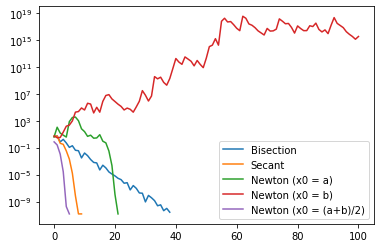

In [5]:
### Problem 3 ###
f = lambda x: x+np.cos(x)
df = lambda x: 1-np.sin(x)
sol = -0.7390851332
print( "Bisection:")
X_B, conv = Bisection(f, a=-5, b=5, tol=1e-10)
print( "Secant:")
X_S, _ = Secant(f, a=-5, b=5, tol=1e-10)
print( "Newton (x0 = a):") # x0 = a
X_Na, _ = Newton_test(f, df, x=-5, sol = sol, tol=1e-10)
print( "Newton (x0 = b):") # x0 = b
X_Nb, _ = Newton_test(f, df, x=5, sol = sol, tol=1e-10)
print( "Newton (x0 = (a+b)/2):" ) # x0 = (a+b)/2
X_Nc, _ = Newton_test(f, df, x=0, sol = sol, tol=1e-10)

plot_Errors(X_B, sol, 'Bisection')
plot_Errors(X_S, sol, 'Secant')
plot_Errors(X_Na, sol, 'Newton (x0 = a)')
plot_Errors(X_Nb, sol, 'Newton (x0 = b)')
plot_Errors(X_Nc, sol, 'Newton (x0 = (a+b)/2)')
plt.legend();

#it =   1 : x = 1.69230769
#it =   2 : x = 1.47511312
#it =   3 : x = 1.32364493
#it =   4 : x = 1.21915491
#it =   5 : x = 1.14772424
#it =   6 : x = 1.09924127
#it =   7 : x = 1.06651021
#it =   8 : x = 1.04449927
#it =   9 : x = 1.02973810
#it =  10 : x = 1.01985773
#it =  11 : x = 1.01325296
#it =  12 : x = 1.00884177
#it =  13 : x = 1.00589740
#it =  14 : x = 1.00393288
#it =  15 : x = 1.00262250
#it =  16 : x = 1.00174858
#it =  17 : x = 1.00116584
#it =  18 : x = 1.00077727
#it =  19 : x = 1.00051821
#it =  20 : x = 1.00034548
#it =  21 : x = 1.00023032
#it =  22 : x = 1.00015355
#it =  23 : x = 1.00010237
#it =  24 : x = 1.00006825
#it =  25 : x = 1.00004551
#it =  26 : x = 1.00003034
#it =  27 : x = 1.00002021
#it =  28 : x = 1.00001332
#it =  29 : x = 1.00000942
conv? = True, #it =  29, x = 1.0000094223758367


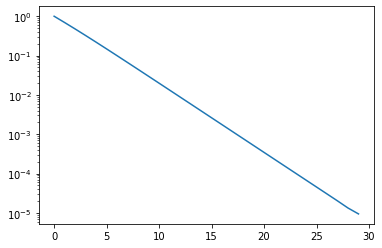

In [6]:
### Problem 4 ###
f = lambda x: x**4-x**3-3*x**2+5*x-2
df = lambda x: 4*x**3-3*x**2-6*x+5
sol = 1.
X, _ = Newton_test(f, df, x=2, sol=sol, itlim = 50, tol=1e-5, verbose=True)
plot_Errors(X, sol, 'Newton(Problem4)')

In [7]:
### Problem 7 ###
def fpm(g, x, tol=1e-5, itlim = 100, verbose= False, print_res = True):
    itcnt = 0;
    conv = False
    X = np.zeros(itlim+2)
    X[0] = x
    while True:
        x_next = g(x)
        itcnt += 1
        X[itcnt] = x_next
        if verbose:
            print( f"#it = {itcnt:3d} : x = {x_next:.5f}")
        if np.abs(x-x_next) < tol:
            conv = True
            break
        if itcnt>=itlim:
            break
        x = x_next
    if print_res:
        print(f"conv? = {conv}, #it = {itcnt:3d}, x = {x_next}")
    X = X[:itcnt+1]        
    return X, conv # second param = true if converged

conv? = True, #it =  22, x = 1.124120456006366
conv? = False, #it = 100, x = 0.9305547315268293
conv? = True, #it =   8, x = 1.1241211111103167
conv? = True, #it =   4, x = 1.124123029704334


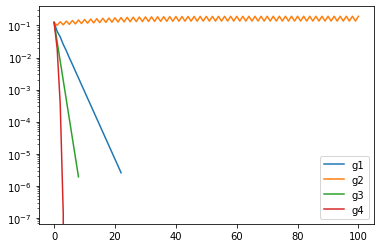

In [8]:
x0 = 1
g1 = lambda x: (3+x-2*x**2)**(1/4)
g2 = lambda x: ((x+3-x**4)/2)**(1/2)
g3 = lambda x: ((x+3)/(x*x+2))**(1/2)
g4 = lambda x: (3*x**4+2*x**2+3)/(4*x**3+4*x-1)

verbose = False
X1, _ = fpm(g1,x0, verbose=verbose)
X2, _ = fpm(g2,x0, verbose=verbose)
X3, _ = fpm(g3,x0, verbose=verbose)
X4, _ = fpm(g4,x0, verbose=verbose)
sol = X4[-1]
plot_Errors(X1, sol, "g1")
plot_Errors(X2, sol, "g2")
plot_Errors(X3, sol, "g3")
plot_Errors(X4, sol, "g4")
plt.legend();